In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# Models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Dataset shape: (4601, 58)
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0

C:\Users\akshith\AppData\Local\Temp\ipykernel_27036\2591102535.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=dataset, palette="Set2")


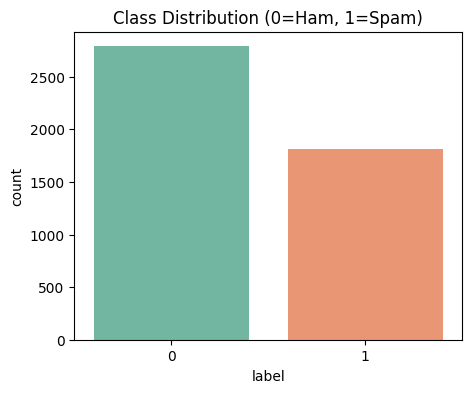


Class distribution:
 label
0    2788
1    1813
Name: count, dtype: int64

📊 Naive Bayes Results:
                Accuracy  Precision    Recall  F1 Score
GaussianNB     0.832790   0.714579  0.958678  0.818824
MultinomialNB  0.776330   0.719888  0.707989  0.713889
BernoulliNB    0.876221   0.871642  0.804408  0.836676

📊 KNN Results (varying k):
    k  Accuracy  Precision    Recall  F1 Score
0  1  0.897937   0.876751  0.862259  0.869444
1  3  0.901194   0.882022  0.865014  0.873435
2  5  0.905537   0.887640  0.870523  0.878999
3  7  0.907709   0.894886  0.867769  0.881119

📊 KNN KDTree vs BallTree:
            Accuracy  Precision    Recall  F1 Score  Training Time (s)
kd_tree    0.905537    0.88764  0.870523  0.878999             0.1195
ball_tree  0.905537    0.88764  0.870523  0.878999             0.1177

📊 SVM Kernel Comparison:
        Kernel                                    Hyperparameters  Accuracy  \
0      Linear                       {'kernel': 'linear', 'C': 1}  0.930510   
1

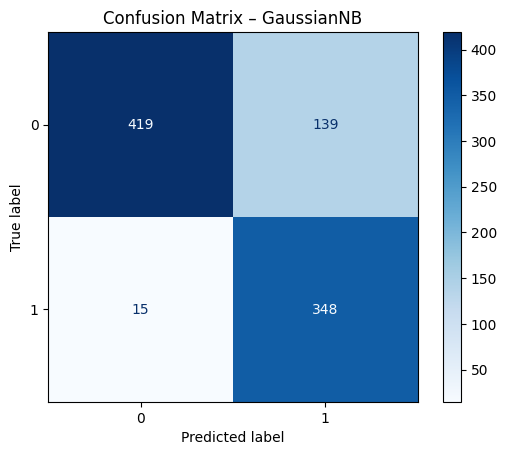

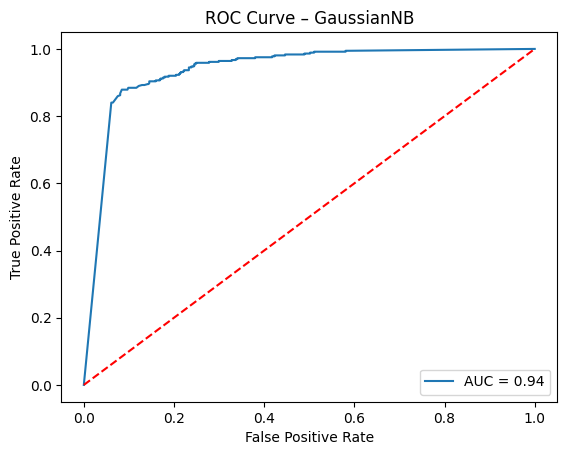

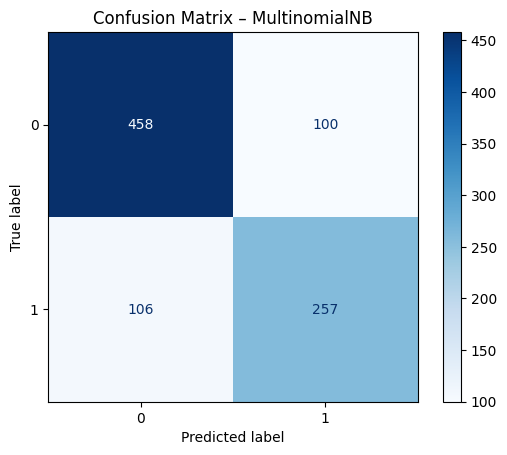

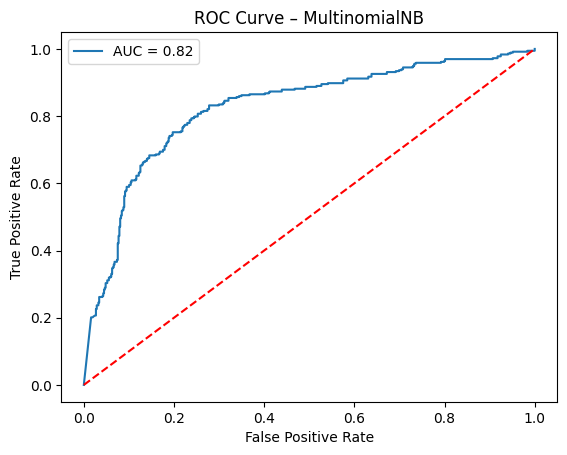

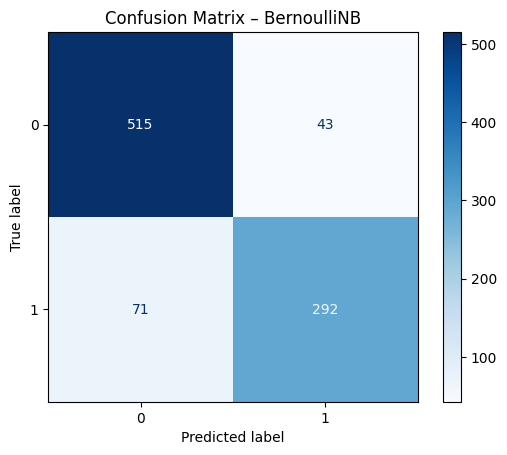

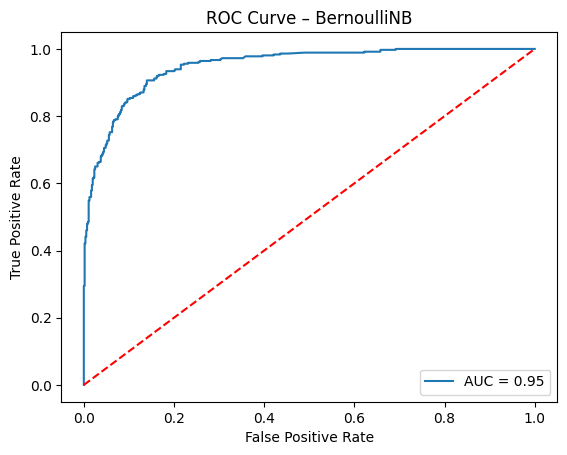

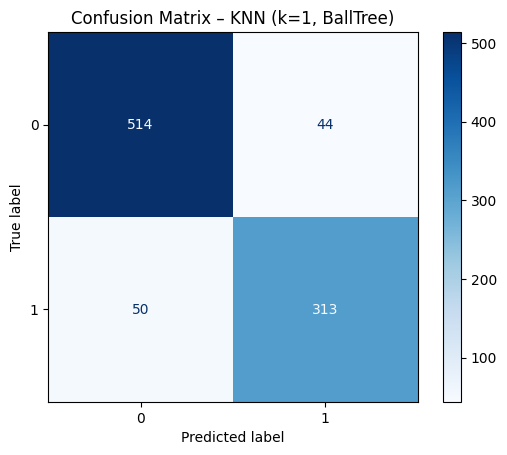

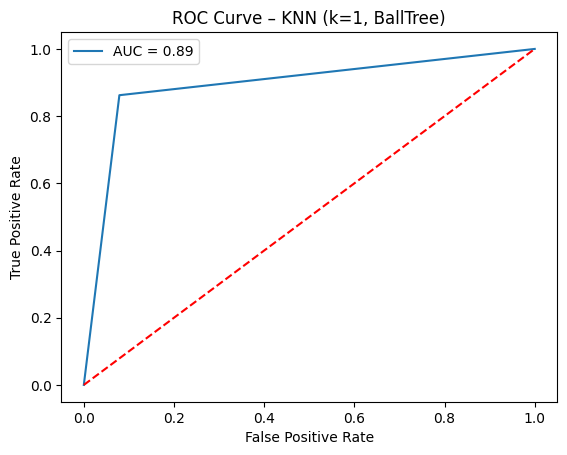

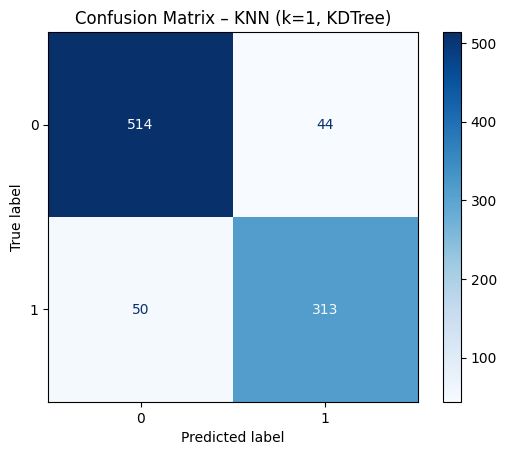

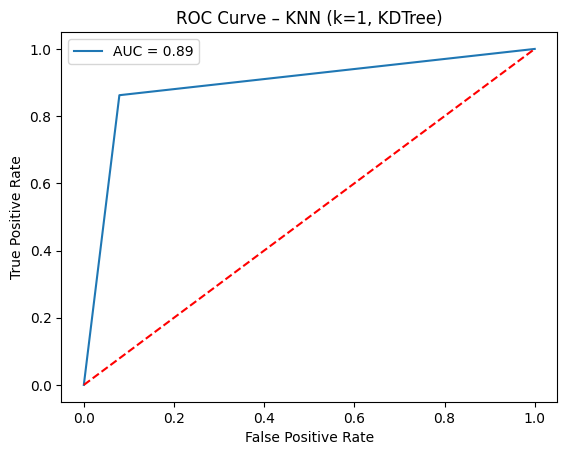

In [1]:
# =====================================
# 📧 Email Spam Classification Notebook
# Models: Naive Bayes, KNN, SVM
# Compatible with Google Colab
# =====================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# 1. Load Dataset


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
dataset = pd.read_csv(url, header=None)

# Add column names (57 features + 1 label)
columns = [f"feature_{i}" for i in range(57)] + ["label"]
dataset.columns = columns

print("Dataset shape:", dataset.shape)
print(dataset.head())


# 2. EDA


plt.figure(figsize=(5,4))
sns.countplot(x="label", data=dataset, palette="Set2")
plt.title("Class Distribution (0=Ham, 1=Spam)")
plt.show()

print("\nClass distribution:\n", dataset["label"].value_counts())

# 3. Preprocessing


X = dataset.drop("label", axis=1)
y = dataset["label"]

# Scaled version (for GaussianNB, KNN, SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test splits
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train_scaled, X_test_scaled, _, _ = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# 4. Train Models


# --- Naive Bayes Variants ---
results = {}
nb_models = {
    "GaussianNB": (GaussianNB(), X_train_scaled, X_test_scaled),   # scaled OK
    "MultinomialNB": (MultinomialNB(), X_train_raw, X_test_raw),   # raw non-negative
    "BernoulliNB": (BernoulliNB(), X_train_raw, X_test_raw)        # raw non-negative
}

for name, (model, Xtr, Xte) in nb_models.items():
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

nb_df = pd.DataFrame(results).T
print("\n📊 Naive Bayes Results:\n", nb_df)

# --- KNN with different k ---
knn_results = []
for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree")
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_results.append([
        k,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ])

knn_df = pd.DataFrame(knn_results, columns=["k", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n📊 KNN Results (varying k):\n", knn_df)

# --- KNN KDTree vs BallTree ---
tree_results = {}
for algo in ["kd_tree", "ball_tree"]:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    end = time.time()
    tree_results[algo] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Training Time (s)": round(end-start, 4)
    }

tree_df = pd.DataFrame(tree_results).T
print("\n📊 KNN KDTree vs BallTree:\n", tree_df)

#  SVM with different kernels 
#  SVM with different kernels 
svm_results = []
kernels = {
    "Linear": {"kernel": "linear", "C": 1},
    "Polynomial": {"kernel": "poly", "C": 1, "degree": 3, "gamma": "scale"},
    "RBF": {"kernel": "rbf", "C": 1, "gamma": "scale"},
    "Sigmoid": {"kernel": "sigmoid", "C": 1, "gamma": "scale"}
}

for kernel_name, params in kernels.items():
    start = time.time()
    svm = SVC(**params)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    end = time.time()
    svm_results.append([
        kernel_name,
        str(params),
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        round(end-start, 4)
    ])

svm_df = pd.DataFrame(
    svm_results, 
    columns=["Kernel", "Hyperparameters", "Accuracy", "F1 Score", "Training Time"]
)
print("\n📊 SVM Kernel Comparison:\n", svm_df)



# 5. Cross Validation


cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []
for model_name, (model, X_all) in {
    "Naive Bayes": (GaussianNB(), X_scaled),
    "KNN": (KNeighborsClassifier(n_neighbors=5), X_scaled),
    "SVM": (SVC(kernel="rbf"), X_scaled)
}.items():
    scores = cross_val_score(model, X_all, y, cv=cv, scoring="accuracy")
    for i, score in enumerate(scores):
        cv_results.append([i+1, model_name, score])

cv_df = pd.DataFrame(cv_results, columns=["Fold", "Model", "Accuracy"])
print("\n📊 Cross-Validation Results (Average Accuracies):\n", cv_df.groupby("Model")["Accuracy"].mean())


# 6. Confusion Matrix & ROC Example (SVM)

# =========================================
# 📊 Extra Confusion Matrices & ROC Curves
# =========================================
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_and_roc(model, Xtr, Xte, ytr, yte, title):
    """Fit model, plot confusion matrix and ROC curve"""
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte)

    # Confusion Matrix
    cm = confusion_matrix(yte, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix – {title}")
    plt.show()

    # ROC Curve (requires predict_proba or decision_function)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xte)[:,1]
    else:
        y_prob = model.decision_function(Xte)
    fpr, tpr, _ = roc_curve(yte, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve – {title}")
    plt.legend()
    plt.show()


# --- GaussianNB ---
plot_confusion_and_roc(GaussianNB(), X_train_scaled, X_test_scaled, y_train, y_test, "GaussianNB")

# --- MultinomialNB ---
plot_confusion_and_roc(MultinomialNB(), X_train_raw, X_test_raw, y_train, y_test, "MultinomialNB")

# --- BernoulliNB ---
plot_confusion_and_roc(BernoulliNB(), X_train_raw, X_test_raw, y_train, y_test, "BernoulliNB")

# --- KNN (k=1, BallTree) ---
plot_confusion_and_roc(KNeighborsClassifier(n_neighbors=1, algorithm="ball_tree"), 
                       X_train_scaled, X_test_scaled, y_train, y_test, "KNN (k=1, BallTree)")

# --- KNN (k=1, KDTree) ---
plot_confusion_and_roc(KNeighborsClassifier(n_neighbors=1, algorithm="kd_tree"), 
                       X_train_scaled, X_test_scaled, y_train, y_test, "KNN (k=1, KDTree)")
